In [1]:
'''
Katie Sipos
DAT-119: final project 
Dec. 2020
There are 3 parts to this program, each in different cells You'll need to run each cell in order for them to work because they are dependent on each other.

1. The first uses pandas and a number of functions to run statistics on Allegheny county air quality data from 2019, 2017, 1983.
2. The second uses matplotlib to create basic scatterplots to show the distribution of AQI for each ear
3. The third uses matplotlib to create basic bar charts to show the counts of each category for each year
'''

import csv
import pandas as pd
import statistics as stats 
import matplotlib.pyplot as plt

# row 1 - 365 2019
# row 366 - 730 2017
# row 731 - 1095 1983 
# In-class reviewer: Monica 


def descriptive_stats(series):
    ''' a function that takes in a series and performs basic statistics on it. only prints out mean, standard dev, min, and max.'''
    # only use mean, std, min, and max w/ describe for readability. removed the noise of quartiles 
    stats = series.describe()[["mean", "std", "min", "max"]]
    # round the values to the nearest 2 for readability 
    stats = round(stats, 2)
    # workaround to print this without the datatype and name and AQI heading 
    print(stats.to_csv(header=None,sep="\t"))
    

def category_count(series, category_string):
    '''a function that takes a series and a category string and counts how many times that string appears in that data series'''
    count_of_category = 0
    # a for loop to look through the dataset for a given string. if it finds that string it increases the count of that category 
    for index in series:
        if index == category_string:
            count_of_category += 1
    return count_of_category

def judge_the_year(good_days, bad_days):
    '''a function that takes in 2 counts and compares them to see if the year had more good or bad air quality days'''
    if good_days > bad_days: 
        print("This was a good year for air quality in Allegheny county! There were", good_days, "good air quality days and", bad_days, "bad air quality days.")
    else:
        print("This was a bad year for air quality in Allegheny county. There were", bad_days, "bad air quality days and", good_days, "good air quality days.")
    

def main():
    # open / read my file and make it usable 
    aqi_data = pd.read_csv("python_119_aqi_data.csv")
    
    # decided to split these up into variables by year insted of just using different files. if I did this again I would just read in different files
    # this pulls out the AQI data for each year 
    aqi_readings_2019 = aqi_data.loc[1:365]["AQI"]
    aqi_readings_2017 = aqi_data.loc[366:730]["AQI"]
    aqi_readings_1983 = aqi_data.loc[731:1096]["AQI"]
       
    # create variables by year for the AQI categories, similar to above ... I would think differently about how I read in files next time 
    aqi_category_2019 = aqi_data.loc[1:365]["Category"]
    aqi_category_2017 = aqi_data.loc[366:730]["Category"]
    aqi_category_1983 = aqi_data.loc[731:1096]["Category"]
    
    # create category variables for the count_of_category function 
    category_1 = "Good"
    category_2 = "Moderate"
    category_3 = "Unhealthy for Sensitive Groups"
    category_4 = "Unhealthy"
    category_5 = "Very Unhealthy"
    
    # calculate and save the average for each year separately     
    yr_2019 = stats.mean(aqi_readings_2019)
    yr_2017 = stats.mean(aqi_readings_2017)
    yr_1983 = stats.mean(aqi_readings_1983)
    
    # save category counts in a variables to be reused for later 
    category_one_2019 = category_count(aqi_category_2019, category_1)
    category_two_2019 = category_count(aqi_category_2019, category_2)
    category_three_2019 = category_count(aqi_category_2019, category_3)
    category_four_2019 = category_count(aqi_category_2019, category_4)
    category_five_2019 = category_count(aqi_category_2019, category_5)
    
    category_one_2017 = category_count(aqi_category_2017, category_1)
    category_two_2017 = category_count(aqi_category_2017, category_2)
    category_three_2017 = category_count(aqi_category_2017, category_3)
    category_four_2017 = category_count(aqi_category_2017, category_4)
    category_five_2017 = category_count(aqi_category_2017, category_5)
    
    category_one_1983 = category_count(aqi_category_1983, category_1)
    category_two_1983 = category_count(aqi_category_1983, category_2)
    category_three_1983 = category_count(aqi_category_1983, category_3)
    category_four_1983 = category_count(aqi_category_1983, category_4)
    category_five_1983 = category_count(aqi_category_1983, category_5)
    
    # calculate the total of good days (good + moderate) and bad days (sum of all other categories) to be used in a function to compare
    good_sum_2019 = (category_one_2019 + category_two_2019)
    bad_sum_2019 = (category_three_2019 + category_four_2019 + category_five_2019)
    
    good_sum_2017 = (category_one_2017 + category_two_2017)
    bad_sum_2017 = (category_three_2017 + category_four_2017 + category_five_2017)
    
    good_sum_1983 = (category_one_1983 + category_two_1983)
    bad_sum_1983 = (category_three_1983 + category_four_1983 + category_five_1983)
    
    # overview of the program 
    print('Hello! The first part of this program analyzes Allegheny County air quality in the years 1983, 2017, and 2019. It calculates the mean, standard deviation, min and max as well as a count breakdown of the different category types of air quality classification. ')
     
    # find the year with the highest average and store in in max_year
    max_year = max(yr_2019, yr_2017, yr_1983)
    # round to the nearest 2 decimals for readability 
    max_year = round(max_year,2)
    
    # print the max year and the difference of that year from the other 2 
    print("\n")
    print("Of the three years 1983 had the highest average, by far, at", max_year, "which was", round((yr_1983 - yr_2017),2), "more than 2017 and", round((yr_1983 - yr_2019),2), "more than 2019. This was likely due to steel and iron mills that were still in their last phases of being open during the 80s.")
    print("\n")
    print("Looking at 2017 & 2019, I can't make a strong data backed claim on if one year is worse or not because the years were so similar. The average of 2017 was only slightly higher with a difference of", round((yr_2017 - yr_2019),2))
    print('\n')

    # print the descriptive statistics per year 
    print("Statistics for 2019:\n")
    descriptive_stats(aqi_readings_2019)
    
    # print the counts of each category 
    print("The count of", category_1, "air quality days in 2019 was", category_one_2019)
    print("The count of", category_2, "air quality days in 2019 was", category_two_2019)
    print("The count of", category_3, "air quality days in 2019 was", category_three_2019)
    print("The count of", category_4, "air quality days in 2019 was", category_four_2019)
    print("The count of", category_5, "air quality days in 2019 was", category_five_2019)
    
    # compare the good and bad sum of 2019 to print 
    print("\n")
    judge_the_year(good_sum_2019, bad_sum_2019)
       
    print("\n")
    print("Statistics for 2017:\n")
    descriptive_stats(aqi_readings_2017)
    
    print("The count of", category_1, "air quality days in 2017 was", category_one_2017)
    print("The count of", category_2, "air quality days in 2017 was", category_two_2017)
    print("The count of", category_3, "air quality days in 2017 was", category_three_2017)
    print("The count of", category_4, "air quality days in 2017 was", category_four_2017)
    print("The count of", category_5, "air quality days in 2017 was", category_five_2017)
    
    print("\n")
    judge_the_year(good_sum_2017, bad_sum_2017)
     
    print("\n")
    print("Statistics for 1983:\n")
    descriptive_stats(aqi_readings_1983)
    
    print("The count of", category_1, "air quality days in 1983 was", category_one_1983)
    print("The count of", category_2, "air quality days in 1983 was", category_two_1983)
    print("The count of", category_3, "air quality days in 1983 was", category_three_1983)
    print("The count of", category_4, "air quality days in 1983 was", category_four_1983)
    print("The count of", category_5, "air quality days in 1983 was", category_five_1983)
    
    print("\n")
    judge_the_year(good_sum_1983, bad_sum_1983)

    
if __name__ == "__main__":
    main()


Hello! The first part of this program analyzes Allegheny County air quality in the years 1983, 2017, and 2019. It calculates the mean, standard deviation, min and max as well as a count breakdown of the different category types of air quality classification. 


Of the three years 1983 had the highest average, by far, at 148.36 which was 88.9 more than 2017 and 89.8 more than 2019. This was likely due to steel and iron mills that were still in their last phases of being open during the 80s.


Looking at 2017 & 2019, I can't make a strong data backed claim on if one year is worse or not because the years were so similar. The average of 2017 was only slightly higher with a difference of 0.9


Statistics for 2019:

mean	58.56
std	20.86
min	25.0
max	161.0

The count of Good air quality days in 2019 was 137
The count of Moderate air quality days in 2019 was 213
The count of Unhealthy for Sensitive Groups air quality days in 2019 was 11
The count of Unhealthy air quality days in 2019 was 4
Th

The second part of this program resuses the data from above and creates 3 basic scatterplots to show the distribution of AQI by year.


AQI Distribution in 2019




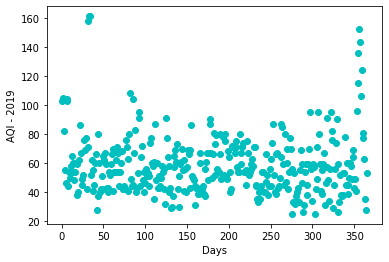

AQI Distribution in 2017




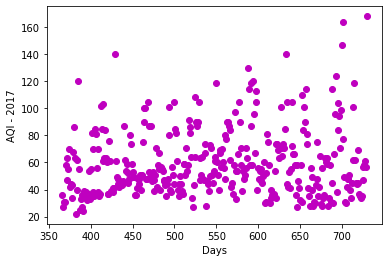

AQI Distribution in 1983




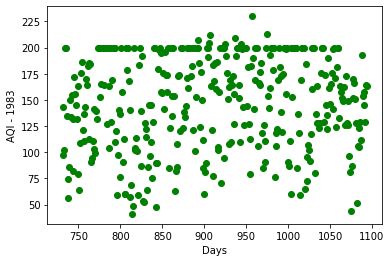

In [13]:
#TODO: learn how to fix dates 

# decided to split these up into variables by year insted of just using different files. if I did this again I would just read in different files
# this pulls out the AQI data for each year 
aqi_readings_2019 = aqi_data.loc[1:365]["AQI"]
aqi_readings_2017 = aqi_data.loc[366:730]["AQI"]
aqi_readings_1983 = aqi_data.loc[731:1096]["AQI"]


print("The second part of this program resuses the data from above and creates 3 basic scatterplots to show the distribution of AQI by year.")
print("\n")

print("AQI Distribution in 2019")
print("\n")

# basic scatterplot to show distribution of 2019
# used matplotlib documentation - https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot 
plt.plot(aqi_readings_2019, 'co')
plt.ylabel("AQI - 2019")
plt.xlabel("Days")
figure = plt.show()


print("AQI Distribution in 2017")
print("\n")

# basic scatterplot to show distribution of 2017
plt.plot(aqi_readings_2017, 'mo')
plt.ylabel("AQI - 2017")
plt.xlabel("Days")
figure = plt.show()

print("AQI Distribution in 1983")
print("\n")

# basic scatterplot to show distribution of 1983
plt.plot(aqi_readings_1983, 'go')
plt.ylabel("AQI - 1983")
plt.xlabel("Days")
figure = plt.show()

The last part of this program reuses pieces of the first and creates three basic horitzontal bar charts to show the count of categories for each year.


AQI by category - 2019


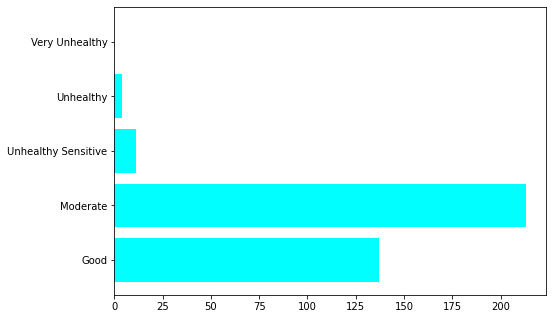

AQI by category - 2017


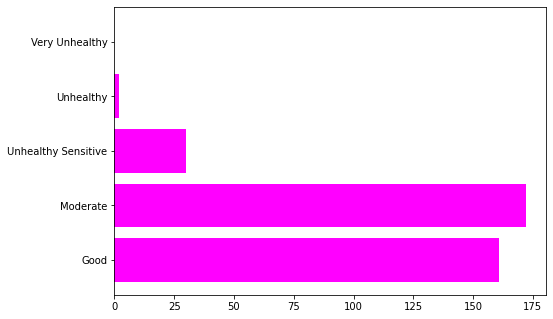

AQI by category - 1983


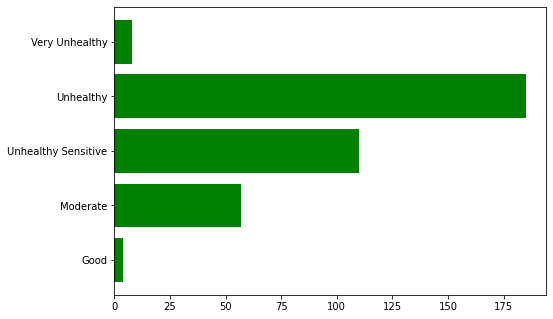

In [14]:
# The last part of this program uses matplotlib to create bar charts for the categories of each year


# create variables by year for the AQI categories, similar to above ... I would think differently about how I read in files next time 
aqi_category_2019 = aqi_data.loc[1:365]["Category"]
aqi_category_2017 = aqi_data.loc[366:730]["Category"]
aqi_category_1983 = aqi_data.loc[731:1096]["Category"]

# create category variables for the count_of_category function 
category_1 = "Good"
category_2 = "Moderate"
category_3 = "Unhealthy for Sensitive Groups"
category_4 = "Unhealthy"
category_5 = "Very Unhealthy"

print("The last part of this program reuses pieces of the first and creates three basic horitzontal bar charts to show the count of categories for each year.")
print("\n")

# creates variable of all the categories to be usesd for making stacked bar chart 
good_count_2019 = category_count(aqi_category_2019, category_1)
moderate_count_2019 = category_count(aqi_category_2019, category_2)
sensitive_count_2019 = category_count(aqi_category_2019, category_3)
unhealthy_count_2019 = category_count(aqi_category_2019, category_4)
very_unhealthy_count_2019 = category_count(aqi_category_2019, category_5)

good_count_2017 = category_count(aqi_category_2017, category_1)
moderate_count_2017 = category_count(aqi_category_2017, category_2)
sensitive_count_2017 = category_count(aqi_category_2017, category_3)
unhealthy_count_2017 = category_count(aqi_category_2017, category_4)
very_unhealthy_count_2017 = category_count(aqi_category_2017, category_5)

good_count_1983 = category_count(aqi_category_1983, category_1)
moderate_count_1983 = category_count(aqi_category_1983, category_2)
sensitive_count_1983 = category_count(aqi_category_1983, category_3)
unhealthy_count_1983 = category_count(aqi_category_1983, category_4)
very_unhealthy_count_1983 = category_count(aqi_category_1983, category_5)

# uses matplotlib to create a basic bar chart visualization of the categories by year 
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.bar.html
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm - tutorial on bar charts 

# 2019 graph 
print("AQI by category - 2019")
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
counts_2019 = [good_count_2019, moderate_count_2019, sensitive_count_2019, unhealthy_count_2019, very_unhealthy_count_2019]
category = [category_1, category_2, "Unhealthy Sensitive", category_4, category_5]
ax.barh(category, counts_2019, color = "cyan")
plt.show()

# 2017 graph
print("AQI by category - 2017")
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
counts_2017 = [good_count_2017, moderate_count_2017, sensitive_count_2017, unhealthy_count_2017, very_unhealthy_count_2017]
category = [category_1, category_2, "Unhealthy Sensitive", category_4, category_5]
ax.barh(category, counts_2017, color = "magenta")
plt.show()

# 1983 graph 
print("AQI by category - 1983")
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
counts_1983 = [good_count_1983, moderate_count_1983, sensitive_count_1983, unhealthy_count_1983, very_unhealthy_count_1983]
category = [category_1, category_2, "Unhealthy Sensitive", category_4, category_5]
ax.barh(category, counts_1983, color = "green")
plt.show()

